In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Standard Case

In [2]:
n = 1000
theta = 10
G = np.random.normal(size=(n, n))
X = (G + np.transpose(G)) / (2*n)**0.5
u = np.random.rand(n)
u = u / np.linalg.norm(u)
u = u[None, :]
X_tilda = X + theta * u * u.transpose()

eigvals1, eigvecs1 = np.linalg.eig(X)
eigvals2, eigvecs2 = np.linalg.eig(X_tilda)

Q = eigvecs1
QT = Q.transpose()
w = np.matmul(QT, u[0, :])

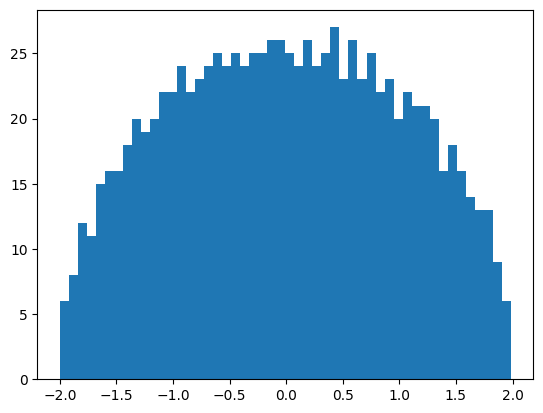

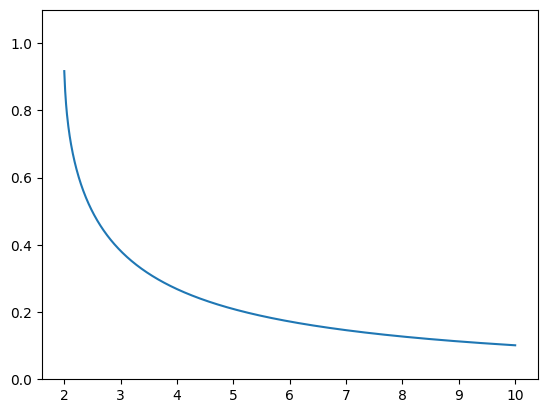

In [3]:
plt.hist(eigvals1, bins=50)
plt.show()
x = np.linspace(2.0001, 10, 1000)
def gx(x, n, lambdas, ws):
    sum = 0
    for i in range(n):
        sum += (ws[i])**2 / (x - lambdas[i])
    return sum
y = [gx(x[i], n, eigvals1, w) for i in range(len(x))]
plt.plot(x, y)
plt.ylim(top=1.1, bottom=0)
plt.show()

## Random lambda

In [12]:
n = 1000
theta = 10
G = np.random.normal(size=(n, n))
eigvalsG, eigvecsG = np.linalg.eig(G)
lambdas = (np.random.rand(n) - 0.5) * 4
Lambda = np.diag(lambdas)
X = eigvecsG@Lambda@np.linalg.inv(eigvecsG)
u = np.random.rand(n)
u = u / np.linalg.norm(u)
u = u[None, :]
X_tilda = X + theta * u * u.transpose()

# eigvals1 = lambdas
# eigvecs1 = eigvecsG
eigvals1, eigvecs1 = np.linalg.eig(X)
eigvals2, eigvecs2 = np.linalg.eig(X_tilda)

Q = eigvecs1
QT = Q.transpose()
w = np.matmul(QT, u[0, :])

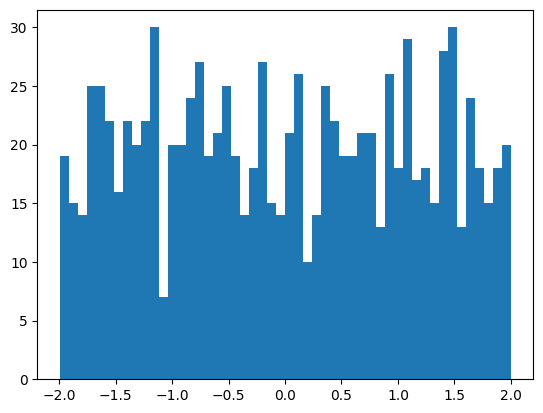

/home/asuka/anaconda3/envs/py3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


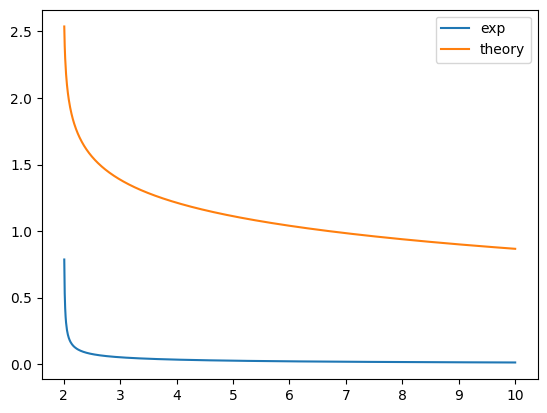

In [13]:
plt.hist(eigvals1, bins=50)
plt.show()
x = np.linspace(2.01, 10, 1000)

def gx(x, n, lambdas, ws):
    sum = 0
    for i in range(n):
        sum += (ws[i])**2 / (x - lambdas[i])
    return sum

y = [gx(x[i], n, eigvals1, w) for i in range(len(x))]
y_theoretical = -1/4*np.log(x-2) + np.log(4)
plt.plot(x, y, label='exp')
plt.plot(x, y_theoretical, label='theory')
plt.legend()
# plt.ylim(top=1.1, bottom=0)
plt.show()

In [11]:
x = [
    [1, 2, 3],
    [2, 3, 4],
    [1, 3, 5],
]
eval, evec = np.linalg.eig(x)
# evec = np.linalg.qr(evec)[0]
Lambda = np.diag(eval)
Q = evec
print(np.matmul(Q, np.linalg.inv(Q)))
x_ = Q@Lambda@np.linalg.inv(Q)
print(x_)

[[ 1.00000000e+00 -2.77555756e-17 -1.38777878e-17]
 [ 2.22044605e-16  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.38777878e-17  1.00000000e+00]]
[[1. 2. 3.]
 [2. 3. 4.]
 [1. 3. 5.]]
